<a href="https://colab.research.google.com/github/SMarco2310/AI-Project/blob/branch1/Intro_to_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**


 We try to rescale all the picture to 160x160 to make the use of the face net algorithm easy

 # **Steps:**

## **Steps 1: Create and new folder to save the changes we made**

- Create new directory for the transformed data
- read the data

- create a function that resize the pictures

## **Step2: Ensure uniform color format and resize all the picture to 160x160**
- resize all the pictures to the 160*160 format
- create a function that changes the color of the picture to RGB color format

## Step3: Change the image format to PNG
- Create a function to convert all the picture from whatever format to PNG


In [ ]:
### Libraries to be used for this task
! pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.metrics.pairwise import euclidean_distances # Or cosine_similarity
# To build the pretained FaceNet model
import torch
import torch.nn as nn
import torch.nn.functional as F

# Data Visualization


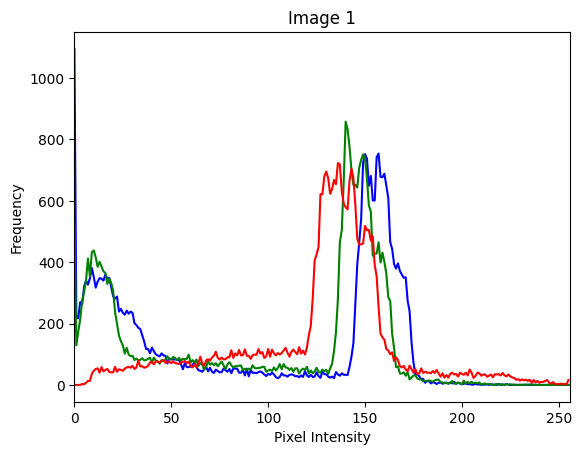

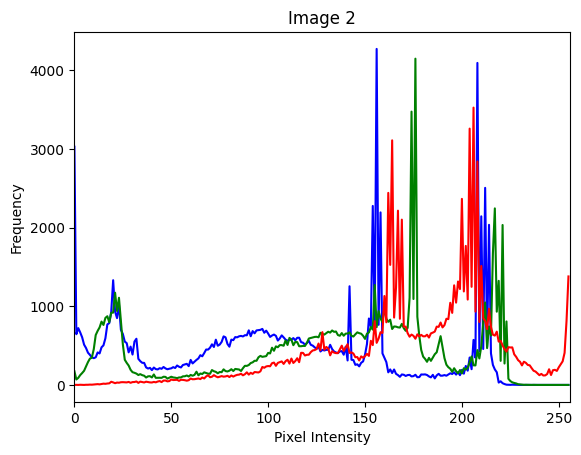

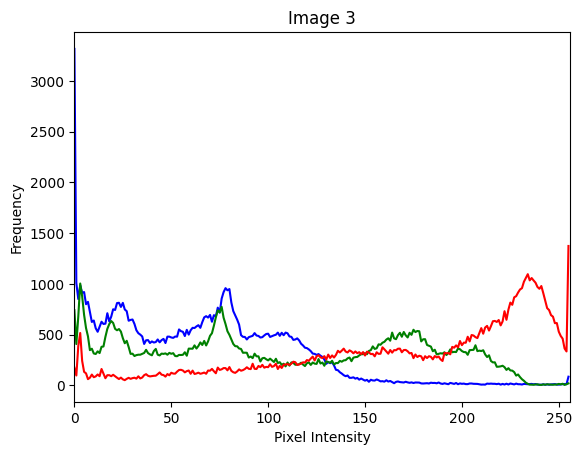

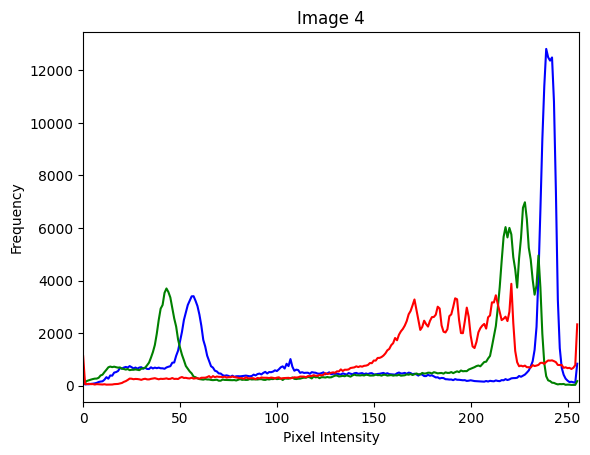

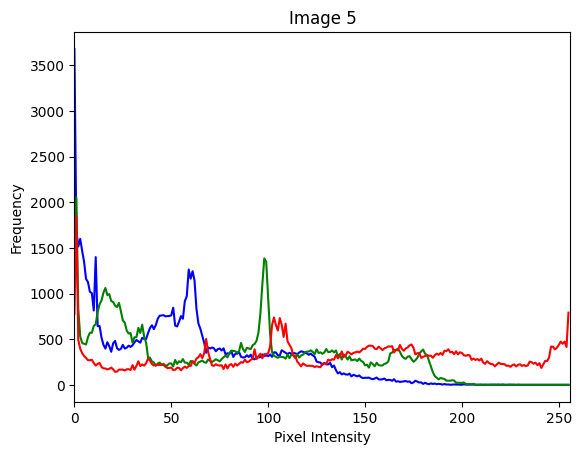

In [ ]:
def plot_color_histogram(image_path, title=None): # Change 'image' to 'image_path'
    image = cv2.imread(image_path)  # Read the image data from the file path
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title or "Color Histogram")
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

def get_image_files(folder_path, extensions={'.jpg', '.jpeg', '.png', '.bmp'}, file_limit=5):
    image_files = []
    for f in os.listdir(folder_path):
        if os.path.splitext(f)[1].lower() in extensions:
            image_files.append(os.path.join(folder_path, f))
            if len(image_files) >= file_limit:
                break  # Stop if file_limit is reached
    return image_files

# Example usage:
image_list = get_image_files('/content/drive/MyDrive/new_dummy_data/staff1')

for i, image in enumerate(image_list):
    plot_color_histogram(image, title=f'Image {i+1}')


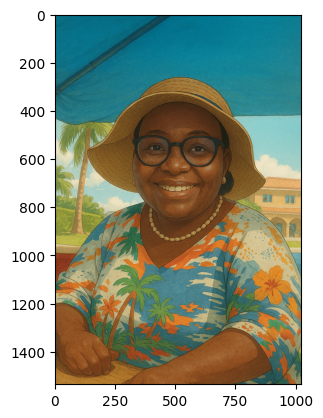

In [ ]:
# This is to have before and after view of the picture

# Before

display_picture = cv2.imread("/content/sample_data/ChatGPT.png")
img= cv2.cvtColor(display_picture, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# This part of the code is to crop the faces out

In [ ]:
import cv2

def detect_and_return_faces(image_path):
    """
    Detects faces in an image and returns a list of cropped face images.

    Args:
        image_path: The path to the input image.

    Returns:
        A list of cropped face images (as numpy arrays).
    """
    # Read the input image
    img = cv2.imread(image_path)

    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

    # Detect faces
    faces_rects = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Crop the faces
    cropped_faces = []
    for (x, y, w, h) in faces_rects:
        face_img = img[y:y + h, x:x + w]
        cropped_faces.append(face_img)


    # print(len(cropped_faces))
    return cropped_faces

# Example usage:
# faces = detect_and_return_faces('/content/drive/MyDrive/new_dummy_data/staff1/staff1_ (1).jpg')
# You can then use cv2.imwrite('face1.jpg', faces[0]) to save, or process further


# Resizing function

In [ ]:
# First Version

def resize_image(picture_name:str):
   img = cv2.imread(picture_name)
   # This resizes the picture to the 160x160 format
   img = cv2.resize(img, (160,160))
   cv2.imwrite("resized_"+picture_name, img)
   # This ensures the RGB color format
   img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   return img

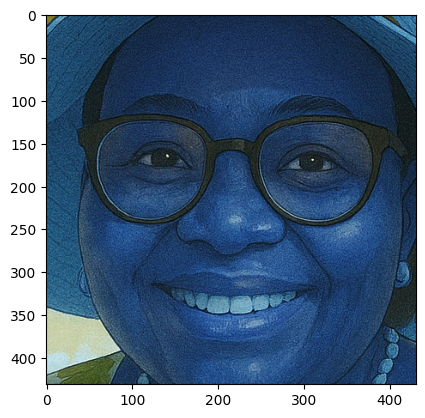

In [ ]:
# After
img1 = detect_and_return_faces("/content/sample_data/ChatGPT.png")
# Assuming you want to resize the first detected face:
if img1:  # Check if any faces were detected
    resized_img1 = cv2.resize(img1[0], (160, 160))  # Resize the NumPy array directly
    resized_img1 = cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB)
    plt.imshow(resized_img1)
else:
    print("No faces detected in the image.")

plt.imshow(img1[0])

In [ ]:
from google import colab
colab.drive.mount('/content/drive')



Mounted at /content/drive


In [13]:
!pip install mtcnn

In [ ]:
import os
import cv2
from mtcnn import MTCNN
import numpy as np

# 1. Initialize the MTCNN model
detector = MTCNN()

# 2. Defining the face alignment function
def align_face(image, keypoints):
    # Coordinates of the two eyes
    left_eye = keypoints['left_eye']
    right_eye = keypoints['right_eye']

    # Center point between the two eyes
    eye_center = ((left_eye[0] + right_eye[0]) * 0.5, (left_eye[1] + right_eye[1]) * 0.5)

    # Calculate the angle
    dy = right_eye[1] - left_eye[1]
    dx = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dy, dx))  # Slope between the two eyes

    # Create the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1.0)

    # Rotate the image
    aligned_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return aligned_image
def resize_image(picture_path: str, output_path: str):
    img = cv2.imread(picture_path)
    if img is not None:  # Check if image was loaded successfully
        img = cv2.resize(img, (160, 160))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(output_path, img)
    else:
        print(f"Could not read image: {picture_path}")  # Print an error message
    return img


# def loop_through_folders(input_dir, output_dir, file_limit=32):
#     """
#     Loops through the folders in the given directory, processes images,
#     and outputs them to a new directory maintaining the structure.

#     Args:
#         input_dir: The input directory containing the images.
#         output_dir: The output directory to save the processed images.
#         file_limit: The maximum number of files to process in each subfolder.
#     """
#     for root, dirs, files in os.walk(input_dir):
#         # Compute relative path from input_dir to current root
#         rel_path = os.path.relpath(root, input_dir)
#         # Create equivalent directory inside output_dir
#         target_dir = os.path.join(output_dir, rel_path)
#         os.makedirs(target_dir, exist_ok=True)

#         file_count = 0  # Initialize file count for each subfolder
#         for file in files:
#             if file.lower().endswith((".png", ".jpg", ".jpeg")):
#                 if file_count < file_limit:  # Check if file limit is reached
#                     #file = str(file)[0] + ".png" # This line was causing the problem
#                     input_path = os.path.join(root, file)
#                     # Assuming you want to keep the original filename and just change the extension to .png:
#                     name, ext = os.path.splitext(file)
#                     output_path = os.path.join(target_dir, name + ".png")
#                     input_path =detect_and_return_faces(input_path)
#                     resize_image(input_path, output_path)
#                     file_count += 1  # Increment file count
#                 else:
#                     break  # Stop processing files in this subfolder

def loop_through_folders(input_dir, output_dir, file_limit=32):
    """
    Loops through the folders in the given directory, processes images,
    and outputs them to a new directory maintaining the structure.

    Args:
        input_dir: The input directory containing the images.
        output_dir: The output directory to save the processed images.
        file_limit: The maximum number of files to process in each subfolder.
    """
    for root, dirs, files in os.walk(input_dir):
      #  Compute relative path from input_dir to current root
        rel_path = os.path.relpath(root, input_dir)
        # Create equivalent directory inside output_dir
        target_dir = os.path.join(output_dir, rel_path)
        os.makedirs(target_dir, exist_ok=True)

        file_count = 0  # Initialize file count for each subfolder
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                if file_count < file_limit:  # Check if file limit is reached
                    # ... (rest of the code) ...
                    input_path = os.path.join(root, file)
                    # Assuming you want to keep the original filename and just change the extension to .png:
                    name, ext = os.path.splitext(file)
                    output_path = os.path.join(target_dir, name + ".png")

                    # Get cropped faces
                    cropped_faces = detect_and_return_faces(input_path)

                    # Iterate through cropped faces and resize/save
                    for i, face in enumerate(cropped_faces):
                        # Create a unique filename for each cropped face
                        face_output_path = os.path.join(target_dir, f"{name}_face{i}.png")

                        # Resize and save the cropped face
                        resize_image(input_path, face_output_path)
                        # Pass the original input_path to ensure correct image loading.

                    file_count += 1  # Increment file count
                else:
                    break

# Example usage:
# input_directory = "/content/drive/MyDrive/val"
# input_directory = "/content/drive/MyDrive/new_dummy_data[1]/new_dummy_data"
input_directory = "/content/drive/MyDrive/new_dummy_data"
# output_directory = "/content/drive/MyDrive/result"
# output_directory = "/content/drive/MyDrive/result2"
output_directory = "/content/drive/MyDrive/result3"
os.makedirs(output_directory, exist_ok=True)

loop_through_folders(input_directory, output_directory, file_limit=100)  # Set file limit to 32

**PRE TRAINED FACENET ALGORITHM** (INCEPTION RESNET)

In [ ]:
# Define a basic Convolutional Layer for reuse in blocks
class FacenetLayer(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=0):
        super(FacenetLayer, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_planes, eps=0.001, momentum=0.1, affine=True)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x


class Block35(nn.Module):
    def __init__(self, scale=1.0):
        super(Block35, self).__init__()
        self.scale = scale
        self.branch0 = FacenetLayer(256, 32, kernel_size=1)
        self.branch1 = nn.Sequential(
            FacenetLayer(256, 32, kernel_size=1),
            FacenetLayer(32, 32, kernel_size=3, padding=1)
        )
        self.branch2 = nn.Sequential(
            FacenetLayer(256, 64, kernel_size=1),
            FacenetLayer(64, 64, kernel_size=3, padding=1),
            FacenetLayer(64, 64, kernel_size=3, padding=1)
        )
        self.conv2d = nn.Conv2d(128, 256, kernel_size=1, stride=1)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        y0 = self.branch0(x)
        y1 = self.branch1(x)
        y2 = self.branch2(x)
        out = torch.cat((y0, y1, y2), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


# class Block17(nn.Module):
#     def __init__(self, scale=1.0):
#         super(Block17, self).__init__()
#         self.scale = scale
#         self.branch0 = FacenetLayer(896, 128, kernel_size=1)
#         # The input channels of the first layer in branch1 was changed from 256 to 896
#         # to match the actual number of channels in the input tensor 'x'
#         self.branch1 = nn.Sequential(
#             FacenetLayer(896, 32, kernel_size=1), # Changed here
#             FacenetLayer(32, 32, kernel_size=(1, 1), padding=(0, 3)),
#             FacenetLayer(32, 128, kernel_size=(7, 1), padding=(3, 0)) # Changed here
#         )
#         # The input channels of the first and second layer in branch2 was changed from 256 and 64 to 896 and 128 respectively
#         # to match the actual number of channels in the input tensor 'x' and output from previous layer
#         self.branch2 = nn.Sequential(
#             FacenetLayer(896, 96, kernel_size=1), # Changed here
#             FacenetLayer(96, 64, kernel_size=3, padding=1), # Changed here
#             FacenetLayer(64, 64, kernel_size=3, padding=1)
#         )
#         self.conv2d = nn.Conv2d(256, 896, kernel_size=1, stride=1)
#         self.relu = nn.ReLU(inplace=False)

#     def forward(self, x):
#         y0 = self.branch0(x)
#         y1 = self.branch1(x)
#         y2 = self.branch2(x)
#         out = torch.cat((y0, y1, y2), 1)
#         out = self.conv2d(out)
#         out = out * self.scale + x
#         out = self.relu(out)
#         return out

class Block17(nn.Module):
    def __init__(self, scale=1.0):
        super(Block17, self).__init__()
        self.scale = scale
        self.branch0 = FacenetLayer(896, 128, kernel_size=1)
        # The input channels of the first layer in branch1 was changed from 256 to 896
        # to match the actual number of channels in the input tensor 'x'
        self.branch1 = nn.Sequential(
            FacenetLayer(896, 128, kernel_size=1), # Changed here
            FacenetLayer(128, 128, kernel_size=(1,7), padding=(0,3)),  # Changed here
            FacenetLayer(128, 128, kernel_size=(7,1), padding=(3,0))  # Changed here
        )
        # The input channels of the first and second layer in branch2 was changed from 256 and 64 to 896 and 128 respectively
        # to match the actual number of channels in the input tensor 'x' and output from previous layer
        self.branch2 = nn.Sequential(
            FacenetLayer(896, 128, kernel_size=1), # Changed here
            FacenetLayer(128, 128, kernel_size=3, padding=1),#changed here
            FacenetLayer(128, 128, kernel_size=3, padding=1) #changed here
        )
        self.conv2d = nn.Conv2d(384, 896, kernel_size=1, stride=1) #changed here
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        y0 = self.branch0(x)
        y1 = self.branch1(x)
        y2 = self.branch2(x)
        out = torch.cat((y0, y1, y2), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        out = self.relu(out)
        return out


class Block8(nn.Module):
    def __init__(self, scale=1.0, noReLU=False):
        super(Block8, self).__init__()
        self.scale = scale
        self.noReLU = noReLU
        # The input channels for branch0 and branch1 were changed from 1792 to 1536
        # to match the actual number of channels in the input tensor 'x'
        self.branch0 = FacenetLayer(1536, 192, kernel_size=1) # Changed here
        self.branch1 = nn.Sequential(
            FacenetLayer(1536, 192, kernel_size=1), # Changed here
            FacenetLayer(192, 192, kernel_size=(1, 3), padding=(1, 0)),
            FacenetLayer(192, 192, kernel_size=(3, 1), padding=(0, 1))
        )
        # The input channels for conv2d were changed from 384 to 384 to reflect the output of branch0 and branch1,
        # and the output channels were changed from 1792 to 1536 to match the number of channels in the residual connection
        self.conv2d = nn.Conv2d(384, 1536, kernel_size=1, stride=1) # Changed here

    def forward(self, x):
        y0 = self.branch0(x)
        y1 = self.branch1(x)
        out = torch.cat((y0, y1), 1)
        out = self.conv2d(out)
        out = out * self.scale + x
        if not self.noReLU:
            out = F.relu(out)
        return out

class Mixed_6a(nn.Module):
    def __init__(self):
        super(Mixed_6a, self).__init__()
        self.branch0 = FacenetLayer(256, 384, kernel_size=3, stride=2)
        # The input channels for branch1 should match the output of the previous layer,
        # which is 256 in this case. It was incorrectly set to 896.
        self.branch1 = nn.Sequential(
            FacenetLayer(256, 192, kernel_size=1),  # Changed from 896 to 256
            FacenetLayer(192, 192, kernel_size=3, padding=1),
            FacenetLayer(192, 256, kernel_size=3, stride=2)
        )
        self.branch2 = nn.MaxPool2d(3, stride=2)

    def forward(self, x):
        #The changes are here
        # The channel numbers for branch0 and branch1 need to be adjusted based on
        #  the number of channels from repeat_2
        #  branch0 has been adjusted based on block17
        y0 = self.branch0(x) if x.shape[1] == 256 else FacenetLayer(x.shape[1], 384, kernel_size=3, stride=2).to(x.device)(x)  # Dynamic channel adjustment
        #branch1 has been adjusted based on block17
        y1 = self.branch1(x) if x.shape[1] == 256 else nn.Sequential(
            FacenetLayer(x.shape[1], 192, kernel_size=1),  # Changed from 896 to x.shape[1]
            FacenetLayer(192, 192, kernel_size=3, padding=1),
            FacenetLayer(192, 256, kernel_size=3, stride=2)
        ).to(x.device)(x)
        y2 = self.branch2(x)
        out = torch.cat((y0, y1, y2), 1)
        return out

class InceptionResNetV2(nn.Module):
    def __init__(self, num_classes=None, pretrained=None):
        super(InceptionResNetV2, self).__init__()
        self.convo2d_1a = FacenetLayer(3, 32, kernel_size=3, stride=2)
        self.conv2d_2a = FacenetLayer(32, 32, kernel_size=3, stride=1)
        self.conv2d_2b = FacenetLayer(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool_3a = nn.MaxPool2d(3, stride=2)
        self.conv2d_3b = FacenetLayer(64, 80, kernel_size=1, stride=1)
        self.conv2d_4a = FacenetLayer(80, 192, kernel_size=3, stride=1)
        self.conv2d_4b = FacenetLayer(192, 256, kernel_size=3, stride=2)

        self.repeat_1 = nn.Sequential(
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17),
            Block35(scale=0.17)
        )

        self.mixed_6a = Mixed_6a()
        self.repeat_2 = nn.Sequential(
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10),
            Block17(scale=0.10)
        )

        self.mixed_7a = Mixed_6a()
        self.repeat_3 = nn.Sequential(
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20),
            Block8(scale=0.20)
        )

        # self.block8 = Block8(noReLU=True)
        # self.avgpool_1a = nn.AdaptiveAvgPool2d(1)
        # self.dropout = nn.Dropout(0.6)
        # self.last_linear = nn.Linear(1792, 128, bias=False)
        # self.last_bn = nn.BatchNorm1d(128, eps=0.001, momentum=0.1, affine=True)


        self.block8 = Block8(noReLU=True)
        self.avgpool_1a = nn.AdaptiveAvgPool2d(1)

        # I made a change here form 0.6 to 0.2
        self.dropout = nn.Dropout(0.3)
        # The input features to the last_linear layer should match the output features of the previous layers.
        # Since block8 outputs 1536 features, the last_linear layer should have 1536 input features.
        self.last_linear = nn.Linear(1536, 128, bias=False)  # Changed input features to 1536
        self.last_bn = nn.BatchNorm1d(128, eps=0.001, momentum=0.1, affine=True)

        self.device = torch.device('cpu')

    def forward(self, x):
        x = self.convo2d_1a(x)
        x = self.conv2d_2a(x)
        x = self.conv2d_2b(x)
        x = self.maxpool_3a(x)
        x = self.conv2d_3b(x)
        x = self.conv2d_4a(x)
        x = self.conv2d_4b(x)
        x = self.repeat_1(x)
        x = self.mixed_6a(x)
        x = self.repeat_2(x)
        x = self.mixed_7a(x)
        x = self.repeat_3(x)
        x = self.block8(x)
        x = self.avgpool_1a(x)
        x = self.dropout(x)
        x = self.last_linear(x.view(x.shape[0], -1))  # Now using the correct input features
        x = self.last_bn(x)

        return F.normalize(x, p=2, dim=1)


**LOADING DATASET AND EXTRACTING EMBEDDINGS**

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd

# Convert image to tensor and Normalize the image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Loading the dataset
# The root directory should contain subfolders representing image classes.

# dataset = datasets.ImageFolder(root="/content/drive/MyDrive/result", transform=transform)
# dataset = datasets.ImageFolder(root="/content/drive/MyDrive/result2", transform=transform)
dataset = datasets.ImageFolder(root="/content/drive/MyDrive/result3", transform=transform)

dataloader = DataLoader(dataset, batch_size=64, shuffle=True) # Create a dataloader for the dataset



In [ ]:
# Extracting Embeddings
def extract_embeddings(model, dataloader):
    model.eval()  # Set model to evaluation mode
    embeddings_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(model.device)
            outputs = model(inputs)

            # If the model outputs a tuple, take the first element which usually contains the features
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            embeddings_list.append(outputs.cpu().numpy())
            labels_list.append(targets.cpu().numpy())

    embeddings = np.vstack(embeddings_list)
    labels = np.concatenate(labels_list)

    return embeddings, labels

model = InceptionResNetV2(num_classes=1000)
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


# Extract embeddings
embeddings, labels = extract_embeddings(model, dataloader)

# Save embeddings to CSV
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['label'] = labels
# embeddings_df.to_csv('/content/drive/MyDrive/embeddings.csv', index=False)
# embeddings_df.to_csv('/content/drive/MyDrive/embeddings2.csv', index=False)
embeddings_df.to_csv('/content/drive/MyDrive/embeddings3.csv', index=False)

print("Embeddings and labels saved to embeddings.csv")



Embeddings and labels saved to embeddings.csv


# This part helps load the embeddings

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Load your CSV file ---
# csv_file_path = '/content/drive/MyDrive/embeddings.csv'  # Replace with the actual path to your CSV file
# csv_file_path = '/content/drive/MyDrive/embeddings2.csv'  # Replace with the actual path to your CSV file
csv_file_path = '/content/drive/MyDrive/embeddings3.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)

# --- Assuming your CSV has columns like 'embedding_0', 'embedding_1', ..., 'label' ---
embedding_columns = [col for col in df.columns if not col.startswith('label')]
X = df[embedding_columns].values
y_labels = df['label'].values

# --- Encode the labels to numerical values ---
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)
num_classes = len(label_encoder.classes_)

# --- Reshape the input for the CNN (add a channel dimension) ---
embedding_dimension = X.shape[1]
X = X.reshape(X.shape[0], embedding_dimension, 1)

# --- Split the data into training, validation, and test sets ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of validation samples: {X_val.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")
print(f"Embedding dimension: {embedding_dimension}")
print(f"Number of classes: {num_classes}")

Number of training samples: 655
Number of validation samples: 459
Number of test samples: 197
Embedding dimension: 128
Number of classes: 16


# Build the CNN model

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # New
# # from sklearn.metrics import recall_score, precision_score
# from tensorflow.keras.metrics import Recall, Precision # Import Recall and Precision from Keras

# from tensorflow.keras.callbacks import EarlyStopping

# def build_cnn_classifier(input_shape, num_classes):
#     model = models.Sequential([
#         layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
#         layers.BatchNormalization(),
#         layers.MaxPooling1D(2),
#         layers.Conv1D(128, 3, activation='relu'),
#         layers.BatchNormalization(),
#         layers.MaxPooling1D(2),
#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation='softmax')
#     ])
#     return model

# # --- Build the CNN model ---
# input_shape = (embedding_dimension, 1)
# cnn_model = build_cnn_classifier(input_shape, num_classes)

# # --- Compile the model ---
# # cnn_model.compile(optimizer='adam',
# #                   loss='sparse_categorical_crossentropy',
# #                   metrics=['accuracy'])

# # New
# cnn_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy', Recall(), Precision()]) # Add recall and precision

# # New ( This for early stoping in case we need it)
# early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
#                               patience=3,         # Number of epochs with no improvement after which training will be stopped
#                               restore_best_weights=True)  # Restore the weights of the epoch with the best value of the monitored quantity.
# # --- Print the model summary to see the architecture ---
# cnn_model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# New
#from sklearn.metrics import recall_score, precision_score # Remove these imports
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision # Import Recall and Precision from Keras

def build_cnn_classifier(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Conv1D(128, 3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        # I made changes here
        layers.Dense(256, activation='relu'),
        # layers.Dense(64, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# --- Build the CNN model ---
input_shape = (embedding_dimension, 1)
cnn_model = build_cnn_classifier(input_shape, num_classes)

# --- Compile the model ---
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# # New
# cnn_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy', Recall(), Precision()]) # Use Keras Recall and Precision

# # New ( This for early stoping in case we need it)
# early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
#                               patience=3,         # Number of epochs with no improvement after which training will be stopped
#                               restore_best_weights=True)  # Restore the weights of the epoch with the best value of the monitored quantity.
# --- Print the model summary to see the architecture ---
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013,136 (3.86 MB)

 Trainable params: 1,012,752 (3.86 MB)

 Non-trainable params: 384 (1.50 KB)

# This part trains the CNN model

In [ ]:
# --- Train the model ---
epochs = 50  # You can adjust the number of epochs
batch_size = 32  # You can adjust the batch size

history = cnn_model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val))


# Modify version for early stoping

# history = cnn_model.fit(X_train, y_train,
#                         epochs=epochs,
#                         batch_size=batch_size,
#                         validation_data=(X_val, y_val),
#                         callbacks=[early_stopping])  # Add the early_stopping callback


# --- Evaluate the model on the test set ---
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


# # --- Evaluate the model on the test set ---
# loss, accuracy, recall, precision = cnn_model.evaluate(X_test, y_test, verbose=0) # Get recall and precision
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Test Recall: {recall:.4f}") # Print recall
# print(f"Test Precision: {precision:.4f}") # Print precision







Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.0694 - loss: 4.9462 - val_accuracy: 0.0610 - val_loss: 2.7706
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.0726 - loss: 2.7576 - val_accuracy: 0.0523 - val_loss: 2.7683
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.0890 - loss: 2.7454 - val_accuracy: 0.0523 - val_loss: 2.7865
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0888 - loss: 2.7069 - val_accuracy: 0.0523 - val_loss: 2.8302
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0881 - loss: 2.6944 - val_accuracy: 0.0523 - val_loss: 2.8870
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0959 - loss: 2.7200 - val_accuracy: 0.0523 - val_loss: 2.9961
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1046 - loss: 2.7328 - val_accuracy: 0.0523 - val_loss: 3.1251
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1328 - loss: 2.6727 - val_accuracy: 0.0523 - v

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3549 - loss: 1.8102 - val_accuracy: 0.1371 - val_loss: 2.9646
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3683 - loss: 1.7707 - val_accuracy: 0.1117 - val_loss: 3.0510
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3398 - loss: 1.7801 - val_accuracy: 0.1320 - val_loss: 3.0779
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3421 - loss: 1.8385 - val_accuracy: 0.0964 - val_loss: 3.1587
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3717 - loss: 1.7590 - val_accuracy: 0.1371 - val_loss: 3.0226
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3630 - loss: 1.7180 - val_accuracy: 0.1066 - val_loss: 3.1212
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3815 - loss: 1.6338 - val_accuracy: 0.1269 - val_loss: 3.3064
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3538 - loss: 1.7317 - val_accuracy: 0.0914 - v

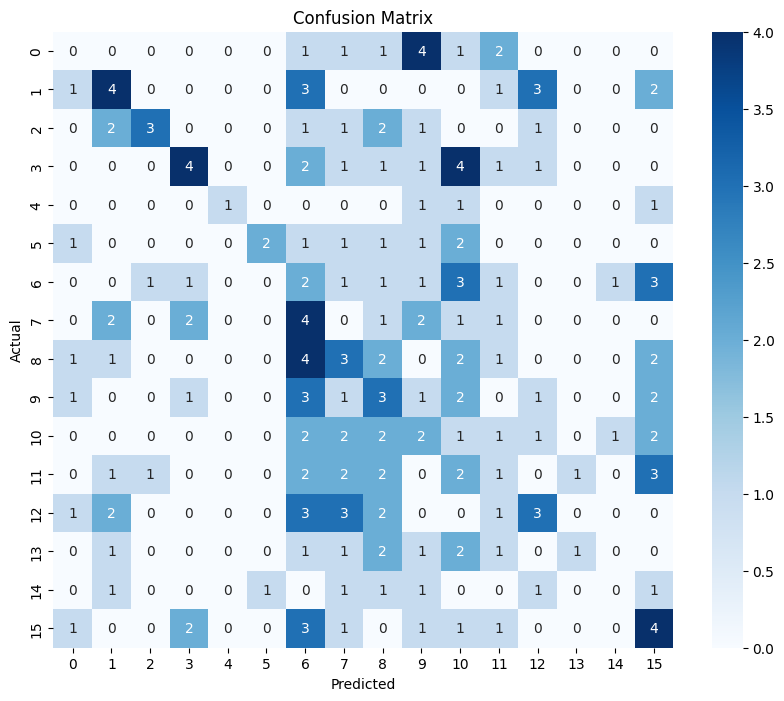

In [ ]:
# === Train the model ===
history = cnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# === Evaluate the model ===
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# === Generate predictions ===
y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
#y_true = np.argmax(y_test, axis=0) # The problem was in this line
y_true = y_test # This is the correction

# === Classification report & metrics ===
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Print separate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# # --- Train the model ---
# epochs = 50  # You can adjust the number of epochs
# batch_size = 32  # You can adjust the batch size

# # ... (rest of the code)

# # --- Evaluate the model on the test set ---
# # Get the number of unique classes in y_test
# num_classes_test = len(np.unique(y_test))

# # Ensure the model output layer has the correct number of units
# cnn_model.layers[-1].units = num_classes_test  # Adjust the output layer

# # Recompile the model with the updated output layer
# cnn_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy', Recall(), Precision()])

# # Now evaluate the model
# loss, accuracy, recall, precision = cnn_model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")
# print(f"Test Recall: {recall:.4f}")
# print(f"Test Precision: {precision:.4f}")

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import to_categorical
# import numpy as np

# # Assuming y_train has already been defined earlier
# num_classes = len(np.unique(y_train))  # Get the actual number of unique classes

# # One-hot encode the labels if using categorical_crossentropy
# y_train_cat = to_categorical(y_train, num_classes=num_classes)
# y_test_cat = to_categorical(y_test, num_classes=num_classes)

# # Define the model
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))  # Corrected output layer

# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test, y_test_cat))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")



# This part is to analyse the training history

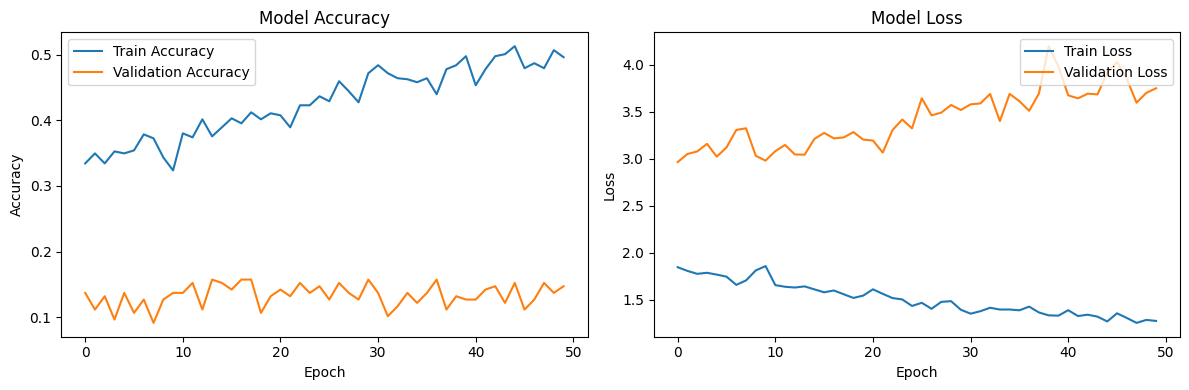

In [ ]:
import matplotlib.pyplot as plt

# --- Plot training & validation accuracy values ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# --- Plot training & validation loss values ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()